<a href="https://colab.research.google.com/github/hmh10098/d2l/blob/main/7_1_Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l

     |████████████████████████████████| 83 kB 779 kB/s 


In [2]:
import torch
from torch import nn
from d2l import torch as d2l

# Question 2#
1. Try simplifying the model to make the training faster, while ensuring that the accuracy does not drop significantly. See it below
2. Design a better model that works directly on  28×28  images. See it below


In [9]:
net = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3), nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=1),# conv1
    nn.Conv2d(32, 128, kernel_size=5, padding=2), nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2), # conv2
    nn.Conv2d(128, 256, kernel_size=3, padding=1), nn.ReLU(), # conv3
    nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(), #conv4
    nn.Conv2d(256, 128, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(), #conv5
    nn.Linear(128*5*5, 2048), nn.Dropout(p=0.5),
    nn.Linear(2048, 2048), nn.Dropout(p=0.5),
    nn.Linear(2048, 10)
)

In [ ]:
net = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3), nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=1),# conv1
    nn.Conv2d(32, 128, kernel_size=5, padding=2), nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2), # conv2
    nn.Conv2d(128, 256, kernel_size=3, padding=1), nn.ReLU(), # conv3
    nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(), #conv4
    nn.Conv2d(256, 128, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(), #conv5
    nn.Linear(128*5*5, 2048), nn.Dropout(p=0.5),
    nn.Linear(2048, 2048), nn.Dropout(p=0.5),
    nn.Linear(2048, 10)
)

# More Simplify model


In [13]:
net = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3), nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=1),# conv1
    nn.Conv2d(32, 64, kernel_size=5, padding=2), nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2), # conv2
    nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(), # conv3
    nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(), #conv4
    nn.Conv2d(128, 64, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(), #conv5
    nn.Linear(64*5*5, 1024), nn.Dropout(p=0.5),
    nn.Linear(1024, 1024), nn.Dropout(p=0.5),
    nn.Linear(1024, 10)
)

In [10]:
X = torch.randn(1, 1, 28, 28)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Conv2d output shape:	 torch.Size([1, 32, 26, 26])
ReLU output shape:	 torch.Size([1, 32, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 32, 24, 24])
Conv2d output shape:	 torch.Size([1, 128, 24, 24])
ReLU output shape:	 torch.Size([1, 128, 24, 24])
MaxPool2d output shape:	 torch.Size([1, 128, 11, 11])
Conv2d output shape:	 torch.Size([1, 256, 11, 11])
ReLU output shape:	 torch.Size([1, 256, 11, 11])
Conv2d output shape:	 torch.Size([1, 256, 11, 11])
ReLU output shape:	 torch.Size([1, 256, 11, 11])
Conv2d output shape:	 torch.Size([1, 128, 11, 11])
ReLU output shape:	 torch.Size([1, 128, 11, 11])
MaxPool2d output shape:	 torch.Size([1, 128, 5, 5])
Flatten output shape:	 torch.Size([1, 3200])
Linear output shape:	 torch.Size([1, 2048])
Dropout output shape:	 torch.Size([1, 2048])
Linear output shape:	 torch.Size([1, 2048])
Dropout output shape:	 torch.Size([1, 2048])
Linear output shape:	 torch.Size([1, 10])


In [11]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


loss 0.308, train acc 0.889, test acc 0.886
3619.2 examples/sec on cuda:0


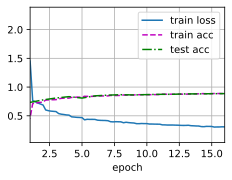

In [15]:
lr, num_epochs = 0.01, 16
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [16]:
from torchsummary import summary
summary(net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
         MaxPool2d-3           [-1, 32, 24, 24]               0
            Conv2d-4           [-1, 64, 24, 24]          51,264
              ReLU-5           [-1, 64, 24, 24]               0
         MaxPool2d-6           [-1, 64, 11, 11]               0
            Conv2d-7          [-1, 128, 11, 11]          73,856
              ReLU-8          [-1, 128, 11, 11]               0
            Conv2d-9          [-1, 128, 11, 11]         147,584
             ReLU-10          [-1, 128, 11, 11]               0
           Conv2d-11           [-1, 64, 11, 11]          73,792
             ReLU-12           [-1, 64, 11, 11]               0
        MaxPool2d-13             [-1, 64, 5, 5]               0
          Flatten-14                 [-